# titaNNic

Tome la competencia de [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic) para practicar con Redes Neuronales.

## Importamos

In [1]:
# pandas
import pandas as pd

# numpy
import numpy as np

# keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from keras.utils import to_categorical ## Util para convertir en categoricas las variables target
from keras.callbacks import EarlyStopping

# matplotlib
import matplotlib.pyplot as plt

# time
from time import time


# Set de Notebook de Jupyter
%matplotlib inline

pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['figure.figsize'] = (16, 12)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Leemos y cargamos el Dataset con Pandas

In [2]:
# Path donde estan los archivos
path_test = '/Users/martin/Documents/GitHub/practica-dma/redes_neuronales/dataset_titanic/test.csv'
path_train = '/Users/martin/Documents/GitHub/practica-dma/redes_neuronales/dataset_titanic/train.csv'

# Leo los dataset
titanic_test = pd.read_csv(path_test)
titanic_train = pd.read_csv(path_train)

In [3]:
# Seteamos el PassangerId como Index
titanic_test.set_index('PassengerId', inplace = True)

In [4]:
# Seteamos el PassangerId como Index
titanic_train.set_index('PassengerId', inplace = True)

In [5]:
# Cantidad de filas que tiene el df
titanic_shape = titanic_train.shape[0]

# Selecciono los index que despues voy a usar en validacion y entrenamiento
valid_index = np.random.choice(titanic_train.index, int(titanic_shape *0.10), replace = False)
valid_index 

array([672,  66, 737, 547, 222, 874, 778, 346, 491, 251, 684,  22, 361,
       252, 740, 828, 798, 291, 692,  14, 575, 278, 527, 397, 191,  83,
       699, 615, 725, 349, 110, 246, 380,  16, 141, 300, 442, 654,  67,
       723, 696, 341, 496, 691, 326, 619, 853, 449, 272, 517, 627, 497,
       559, 834, 852, 221, 688, 324, 247,  95, 784, 697,  25, 557, 303,
       845,  45,  41,  70, 806, 493, 800,  71, 509, 180, 794, 792, 124,
       647, 245, 190, 129, 261, 750, 430, 295, 102, 621, 112])

In [6]:
# Cargamos el df
titanic_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.45,NaN,S


## Exploracion del dataset

### Tipos de Datos en el dataset

In [7]:
# Cuales son los tipos de datos que componen el dataset
tipo_datos = titanic_train.dtypes

In [8]:
tipo_datos[tipo_datos == 'object']

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

### Exploramos si hay nulos en el dataset

In [9]:
# Nos fijamos los nulos que hay en el dataset
nulos = titanic_train.isnull().sum()
nulos = nulos[nulos > 0] 
print(nulos)

Age         177
Cabin       687
Embarked      2
dtype: int64


#### Edad

In [10]:
# Identifico aquellos registros que tienen Null en Age
titanic_train['Age_ISNULL'] = titanic_train.Age.isnull().astype(int)

In [11]:
# Completo Age con la media
age_mean = titanic_train.Age.mean()
titanic_train['Age'] = titanic_train.Age.fillna(age_mean)

#### Embarked

In [12]:
# Identifico los casos con Null
titanic_train[titanic_train.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_ISNULL
PassengerId,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.00,0,0,113572,80.00,B28,NaN,0
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.00,B28,NaN,0


In [13]:
# Podemos asumir que siendo de la misma clase y que hayan pagado la misma tarifa, que se embarcaron en el mismo puerto
titanic_train[(titanic_train.Fare >= 70) & (titanic_train.Fare <= 90)].Embarked.fillna(-1).value_counts()

S     25
C     19
-1     2
Q      2
Name: Embarked, dtype: int64

In [14]:
# Entonces, marcamos los casos nulos
titanic_train['Embarked_ISNULL'] = titanic_train.Embarked.isnull().astype(int)

In [15]:
# Ahora, agregamos los dos casos nulos a la categoria S
titanic_train['Embarked'] = titanic_train.Embarked.fillna('S')

#Chequeo
titanic_train.loc[[62,830],['Embarked']]

,Embarked
PassengerId,
62,S
830,S


#### Cabin

In [16]:
# Utilizo Factorize. Factorize genera un array con el indice y el valor.
titanic_train['Cabin'] = titanic_train.Cabin.fillna(-1).factorize()[0]

In [17]:
titanic_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_ISNULL,Embarked_ISNULL
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,0,S,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,1,C,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,0,S,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,2,S,0,0
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,0,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,0,S,0,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,146,S,0,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.70,1,2,W./C. 6607,23.45,0,S,1,0


### Conversion de Tipo de Datos Objeto

Los tipos de datos que son objeto, son los siguientes:

- Sex
- Name
- Embarked
- Ticket

Usamos diferentes tecnicas para llevar esos datos a numeros.

#### Sex

Lo que vamos a hacer con esta variable, es convertilo en binario.

In [18]:
titanic_train['Sex'] = titanic_train.Sex.apply(lambda x: {'male':0, 'female':1}[x])

In [19]:
titanic_train[['Sex']]

,Sex
PassengerId,
1,0
2,1
3,1
4,1
5,0
...,...
887,0
888,1
889,1


#### Embarked

En este caso, lo que haremos es hacer One Hot Encoding.

In [20]:
# Obtenemos las dummies para el campo Embarked con 'get_dummies'
dummies_embarked = pd.get_dummies(titanic_train.Embarked)
print(dummies_embarked)

             C  Q  S
PassengerId         
1            0  0  1
2            1  0  0
3            0  0  1
4            0  0  1
5            0  0  1
...         .. .. ..
887          0  0  1
888          0  0  1
889          0  0  1
890          1  0  0
891          0  1  0

[891 rows x 3 columns]


In [21]:
# Ahora joineamos esta data al dataset titanic_train
# Ademas dropeamos la columna 'Embarked'
titanic_train = titanic_train.join(dummies_embarked).drop('Embarked', axis = 1)

In [22]:
# Vemos como quedo
titanic_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_ISNULL,Embarked_ISNULL,C,Q,S
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.00,1,0,A/5 21171,7.25,0,0,0,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.00,1,0,PC 17599,71.28,1,0,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",1,26.00,0,0,STON/O2. 3101282,7.92,0,0,0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00,1,0,113803,53.10,2,0,0,0,0,1
5,0,3,"Allen, Mr. William Henry",0,35.00,0,0,373450,8.05,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",0,27.00,0,0,211536,13.00,0,0,0,0,0,1
888,1,1,"Graham, Miss. Margaret Edith",1,19.00,0,0,112053,30.00,146,0,0,0,0,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.70,1,2,W./C. 6607,23.45,0,1,0,0,0,1


#### Ticket

In [23]:
# Uso Factorize
titanic_train['Ticket'] = titanic_train.Ticket.factorize()[0]

In [24]:
# Dropeo la variable Name, que es la unica que me quedo como objeto
titanic_train.drop('Name', axis = 1, inplace = True)

In [25]:
# Veo como quedo
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_ISNULL,Embarked_ISNULL,C,Q,S
PassengerId,,,,,,,,,,,,,,
1,0,3,0,22.00,1,0,0,7.25,0,0,0,0,0,1
2,1,1,1,38.00,1,0,1,71.28,1,0,0,1,0,0
3,1,3,1,26.00,0,0,2,7.92,0,0,0,0,0,1
4,1,1,1,35.00,1,0,3,53.10,2,0,0,0,0,1
5,0,3,0,35.00,0,0,4,8.05,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,0,27.00,0,0,677,13.00,0,0,0,0,0,1
888,1,1,1,19.00,0,0,678,30.00,146,0,0,0,0,1
889,0,3,1,29.70,1,2,614,23.45,0,1,0,0,0,1


## Preparando el terreno para aplicar Redes

### Normalizacion

In [26]:
# Normalizo todo menos el Target que es la columna 'Survived' y aquellas columnas binarias
no_norm = ['Survived', 'Embarked_ISNULL', 'Age_ISNULL', 'C', 'Q', 'S', 'Sex']

for column in titanic_train:
    if column not in no_norm:
        titanic_train[column] = titanic_train[column].apply(lambda x: (x-titanic_train[column].mean())/titanic_train[column].std())
    else:
        titanic_train[column] = titanic_train[column]

# Veo como quedo el dataset
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_ISNULL,Embarked_ISNULL,C,Q,S
PassengerId,,,,,,,,,,,,,,
1,0,0.83,0,-0.59,0.43,-0.47,-1.56,-0.50,-0.44,0,0,0,0,1
2,1,-1.57,1,0.64,0.43,-0.47,-1.55,0.79,-0.42,0,0,1,0,0
3,1,0.83,1,-0.28,-0.47,-0.47,-1.55,-0.49,-0.44,0,0,0,0,1
4,1,-1.57,1,0.41,0.43,-0.47,-1.54,0.42,-0.39,0,0,0,0,1
5,0,0.83,0,0.41,-0.47,-0.47,-1.54,-0.49,-0.44,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,-0.37,0,-0.21,-0.47,-0.47,1.88,-0.39,-0.44,0,0,0,0,1
888,1,-1.57,1,-0.82,-0.47,-0.47,1.88,-0.04,3.73,0,0,0,0,1
889,0,0.83,1,0.00,0.43,2.01,1.56,-0.18,-0.44,1,0,0,0,1


### Separando el dataset en Entrenamiento y Validacion

In [27]:
# Divido el dataset en Entrenamiento (train) y Validacion (valid)
# Para eso uso la variable 'valid_index'.
# Para el dataset de entrenamiento: dropeo todos aquellos indices de la variable 'valid_index'

#train = titanic_train.drop(valid_index, axis = 0)
#valid = titanic_train.loc[valid_index]

Para un problema de clasificacion con Redes Neuronales, la variable target hay que convertirlas en categoricas. De manera que queden en dos columnas: una para los casos 0 y otra para los casos 1.

La Capa de Salida (output_layer) tiene 2 neuronas.

Usamos `to_categorical` para transformar el target `Survived` en categorica.

In [128]:
predictors, target = titanic_train.drop('Survived', axis = 1).as_matrix(), to_categorical(titanic_train.Survived)
#X_valid, target_valid = valid.drop('Survived', axis = 1).as_matrix(), to_categorical(valid.Survived)

### Armo la red

In [158]:
# Necesito setear la variable de input para todos los modelos
# Cantidad de Columnas
n_cols = predictors.shape[1]
input_shape = (n_cols,)

#### Modelo 1

In [163]:
# Selecciono Modelo
model_1 = Sequential()

# Especifico la Red
model_1.add(Dense(36, activation = 'relu', input_shape = input_shape))
model_1.add(Dense(2, activation = 'softmax'))

# Compilo la Red - Optimizer: Stochastic Gradient Descent (SGD)
model_1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#### Modelo 2: Mas nodos

In [164]:
# Selecciono el Modelo
model_2 = Sequential()

# Especifico la Red
model_2.add(Dense(100, activation = 'relu', input_shape = input_shape))
model_2.add(Dense(2, activation = 'softmax'))

# Compilo el modelo
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#### Modelo 3: Agrego Capa Oculta

In [165]:
# Selecciono el Modelo
model_3 = Sequential()

# Especifico la Red
model_3.add(Dense(100, activation = 'relu', input_shape = input_shape))
model_3.add(Dense(20, activation = 'relu'))
model_3.add(Dense(2, activation = 'softmax'))

# Compilo el modelo
model_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Estrategia para armar modelos.

Tenemos que ir buscando modelos mas complejos que hagan decrecer el error en validacion. 

OJO CON HACER MODELOS MUY COMPLEJOS porque sino vamos a overfittear y la red va a capturar todos los ruidos del dataset...


#### Ajuste de los Modelos y Comparacion Grafica

##### EARLY STOPPING
En este caso, definimos una condicion para que el modelo pare si no mejora `val_loss` (la perdida en el set de validacion).

Para ello utilizamos `EarlyStopping` de keras y definimos la variable `patience`.
La variable `patience` define cuantas `epochs` en que no mejora `val_loss` va a esperar el modelo antes de parar.

Nos ayuda a que no 'overfiteemos el modelo'

Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 3s 5ms/step - loss: 0.7548 - acc: 0.4735 - val_loss: 0.7671 - val_acc: 0.4739
Epoch 2/30
623/623 [==============================] - 0s 179us/step - loss: 0.6237 - acc: 0.6854 - val_loss: 0.6589 - val_acc: 0.6343
Epoch 3/30
623/623 [==============================] - 0s 188us/step - loss: 0.5746 - acc: 0.7480 - val_loss: 0.6032 - val_acc: 0.7388
Epoch 4/30
623/623 [==============================] - 0s 182us/step - loss: 0.5488 - acc: 0.7512 - val_loss: 0.5686 - val_acc: 0.7575
Epoch 5/30
623/623 [==============================] - 0s 192us/step - loss: 0.5297 - acc: 0.7624 - val_loss: 0.5497 - val_acc: 0.7761
Epoch 6/30
623/623 [==============================] - 0s 178us/step - loss: 0.5135 - acc: 0.7705 - val_loss: 0.5293 - val_acc: 0.7799
Epoch 7/30
623/623 [==============================] - 0s 184us/step - loss: 0.5003 - acc: 0.7769 - val_loss: 0.5140 - val_acc: 0.7948
Epoch 8/30
623/623

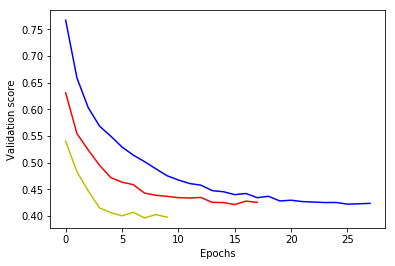

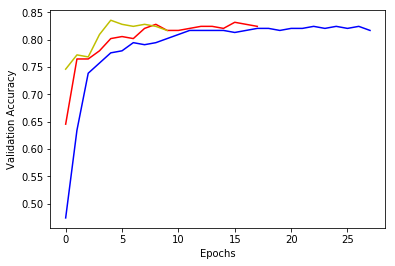

In [166]:
# Early Stopping: Esta variable setea si despues de dos epocas no mejora la perdida en validacion, entonces para.
# Nos ayuda a que no overfitteemos el modelo
early_stopping_monitor = EarlyStopping(patience=2)

# Ajuste Modelo 1
model_1_training = model_1.fit(predictors, target, epochs=30, callbacks = [early_stopping_monitor], validation_split = 0.3)

# Ajuste Modelo 2
model_2_training = model_2.fit(predictors, target, epochs=30, callbacks = [early_stopping_monitor], validation_split = 0.3)

# Ajuste Modelo 3
model_3_training = model_3.fit(predictors, target, epochs=30, callbacks = [early_stopping_monitor], validation_split = 0.3)

# Armo el grafico para ver como evoluciona cada modelo
plt.plot (model_1_training.history['val_loss'], 'b', model_2_training.history['val_loss'], 'r', model_3_training.history['val_loss'], 'y')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

plt.plot (model_1_training.history['val_acc'], 'b', model_2_training.history['val_acc'], 'r', model_3_training.history['val_acc'], 'y')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

### Guardamos el modelo y usamos el modelo para predecir

In [66]:
# COSAS POR HACER
#UNIR EL DATASET TEST Y TRAIN... PARA PODER ENVIAR LOS RESULTADOS A KAGGLE.




#model.save('model_file.h5')
#my_model = load_model('my_model.h5')
#predictions = my_model.predict(data_para_predecir)
#probability_true = predictions[:,1]

# Para ver la estructura del modelo:
model.summary()

NameError: name 'model' is not defined